<a href="https://colab.research.google.com/github/sachit3071/Machine-Learning/blob/main/MNIST_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [35]:
#Standard imports
import os

#Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from collections import Counter
import tensorflow as tf
from collections import Counter
from sklearn.metrics import confusion_matrix


### Load data

In [36]:
X , y  = fetch_openml('mnist_784' , return_X_y=True)

In [37]:
x_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)

In [38]:
x_train = x_train.astype(int)
y_train = y_train.astype(int)

### Exploratory Data Analysis(EDA)

<function matplotlib.pyplot.show>

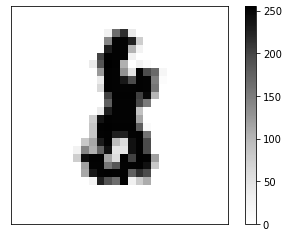

In [39]:
plt.imshow(x_train.iloc[17222].values.reshape(28,28), cmap='Greys',  interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show

In [40]:
# def plot_ten_img(xt,yt):
#     fig, axes = plt.subplots(10,10,figsize=(10,10))
#     for i in range(10):
#         images = xt[i==yt].iloc[:10].values
#         for j, img in enumerate(images):
#             axes[i,j].imshow(img.reshape(28,28),cmap="Greys")
#             axes[i,j].set_xticks([])
#             axes[i,j].set_yticks([])
#     plt.show()
# plot_ten_img(x_train,y_train)

# Logistic Regression

In [41]:
xt,xv,yt,yv=train_test_split(x_train, y_train, test_size=0.20)
clf = LogisticRegression(max_iter=200)
yt = yt.astype(int)
yv = yv.astype(int)
clf.fit(xt,yt)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
xt.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
779    int64
780    int64
781    int64
782    int64
783    int64
Length: 784, dtype: object

In [43]:
y_pred = clf.predict(xv)
y_pred = y_pred.astype(int)
ds_predictions=yv.copy()
# y_pred = y_pred.reshape(14000,)
ds_predictions["prediction"] = y_pred.copy()
# correct_prediction = (y_pred == yv)
ds_predictions.columns = ['label','prediction']
ds_predictions["correct/incorrect"] = ((ds_predictions["label"]==ds_predictions["prediction"])).astype(int)
ds_predictions

,label,prediction,correct/incorrect
59770,6,6,1
7760,2,2,1
59916,8,8,1
18212,0,0,1
36040,0,0,1
...,...,...,...
16249,3,3,1
64249,1,1,1
56942,0,0,1
41020,4,9,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


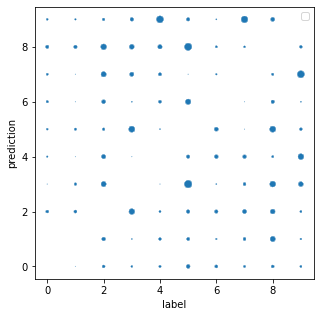

,label,prediction,correct/incorrect,count
51764,5,2,0,13
53120,5,9,0,12
52907,3,9,0,13
3975,2,8,0,33
15548,1,5,0,6
...,...,...,...,...
23698,7,9,0,45
6861,2,7,0,28
24192,4,9,0,49
32774,8,3,0,35


In [45]:
counts = Counter([(x, y) for x, y in zip(ds_predictions['label'],ds_predictions['prediction'])])
size = [counts[(x, y)] for x, y in zip(ds_predictions['label'],ds_predictions['prediction'])]
ds_predictions['count']=size
axes,fig = plt.subplots(figsize=(5,5))
ds_predictions = ds_predictions[ds_predictions["label"]!=ds_predictions["prediction"]]
sns.scatterplot(x = 'label', y = 'prediction', s = size, data = ds_predictions, hue = 'correct/incorrect')
plt.legend([])
plt.show()
ds_predictions

# Result generated by Logistic Regression

In [57]:
accuracies = clf.score(xt,yt)
print(f"Accuracy :{np.mean(accuracies)*100:.2f}%")

Accuracy :93.96%


# Training with Neural Networks

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [48]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [49]:
hist=model.fit(
    x=xt.values,
    y=yt.values,
    epochs=8,
    validation_split=0.20
)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1400/1400 [==============================] - 5s 3ms/step - loss: 0.4996 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.2866 - val_sparse_categorical_accuracy: 0.9166
Epoch 2/8
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2674 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.2430 - val_sparse_categorical_accuracy: 0.9280
Epoch 3/8
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2416 - sparse_categorical_accuracy: 0.9263 - val_loss: 0.2127 - val_sparse_categorical_accuracy: 0.9398
Epoch 4/8
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2262 - sparse_categorical_accuracy: 0.9319 - val_loss: 0.2272 - val_sparse_categorical_accuracy: 0.9342
Epoch 5/8
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2289 - sparse_categorical_accuracy: 0.9311 - val_loss: 0.2129 - val_sparse_categorical_accuracy: 0.9345
Epoch 6/8
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2090 - sparse_categorical_ac

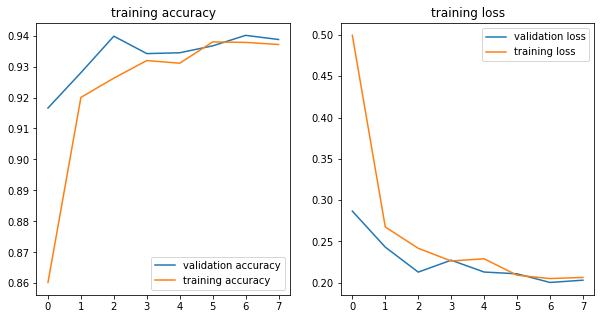

In [50]:
def plot_training_and_validation_curves(hst):
    fig,axes=plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(hst.history['val_sparse_categorical_accuracy'],label='validation accuracy')
    axes[0].plot(hst.history['sparse_categorical_accuracy'],label='training accuracy')
    axes[0].set_title('training accuracy')
    axes[0].legend()
    
    axes[1].plot(hst.history['val_loss'],label='validation loss')
    axes[1].plot(hst.history['loss'],label='training loss')
    axes[1].set_title('training loss')
    axes[1].legend()

plot_training_and_validation_curves(hist)

### Experimentation with different architecture

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1400/1400 [==============================] - 4s 3ms/step - loss: 0.5196 - sparse_categorical_accuracy: 0.8575 - val_loss: 0.3288 - val_sparse_categorical_accuracy: 0.9043
Epoch 2/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2871 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.2689 - val_sparse_categorical_accuracy: 0.9237
Epoch 3/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2469 - sparse_categorical_accuracy: 0.9273 - val_loss: 0.2226 - val_sparse_categorical_accuracy: 0.9340
Epoch 4/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2255 - sparse_categorical_accuracy: 0.9319 - val_loss: 0.2332 - val_sparse_categorical_accuracy: 0.9301
Epoch 5/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2156 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2382 - val_sparse_categorical_accuracy: 0.9267
Epoch 6/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2130 - sparse_categoric

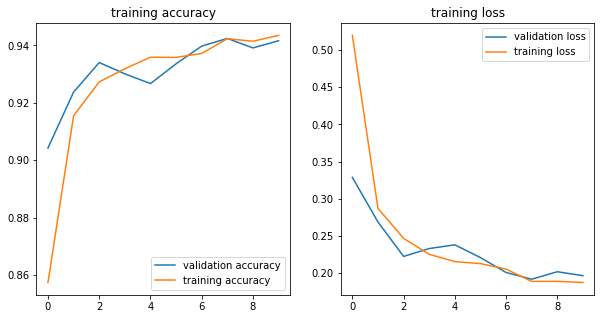

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
# es=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=1)
hist=model.fit(
    x=xt.values,
    y=yt.values,
    epochs=10,
    validation_split=0.20,
#     callbacks=[es]
)
plot_training_and_validation_curves(hist)

### Model Evaluation and Confusion matrix

In [52]:
y_train.shape

(70000, 1)

In [53]:
y_predict = model.predict(x_train.values)
y_pred_classes = np.argmax(y_predict,axis=1)
conf_matrix = confusion_matrix(y_train.values, y_pred_classes)
conf_matrix

array([[6749,    1,   41,    4,   11,    6,   43,    4,   39,    5],
       [   1, 7566,   71,   17,   11,   11,   35,   11,  137,   17],
       [  54,    7, 6710,   24,   32,    4,   17,   47,   92,    3],
       [  44,    8,  204, 6549,    2,  113,    7,   38,  146,   30],
       [   8,   15,   58,    4, 6423,    5,   50,   20,   55,  186],
       [  88,    7,   33,  209,   39, 5647,   94,   11,  126,   59],
       [  62,   19,   37,    2,   34,   27, 6644,    0,   51,    0],
       [  22,   38,   97,   30,   62,    2,    0, 6946,   21,   75],
       [  56,   48,   64,   60,    7,   55,   60,   12, 6440,   23],
       [  37,   18,   19,   96,  151,   38,   10,  161,   83, 6345]])

In [54]:
column_names=[f"predicted {i}" for i in range(10)]
row_names=[f"actual {i}" for i in range(10)]
readable_conf_matrix=pd.DataFrame(conf_matrix, index=row_names,columns=column_names)
readable_conf_matrix

,predicted 0,predicted 1,predicted 2,predicted 3,predicted 4,predicted 5,predicted 6,predicted 7,predicted 8,predicted 9
actual 0,6749,1,41,4,11,6,43,4,39,5
actual 1,1,7566,71,17,11,11,35,11,137,17
actual 2,54,7,6710,24,32,4,17,47,92,3
actual 3,44,8,204,6549,2,113,7,38,146,30
actual 4,8,15,58,4,6423,5,50,20,55,186
actual 5,88,7,33,209,39,5647,94,11,126,59
actual 6,62,19,37,2,34,27,6644,0,51,0
actual 7,22,38,97,30,62,2,0,6946,21,75
actual 8,56,48,64,60,7,55,60,12,6440,23
actual 9,37,18,19,96,151,38,10,161,83,6345


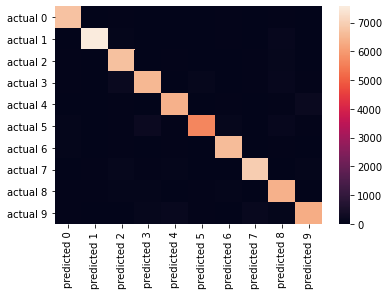

In [55]:
sns.heatmap(readable_conf_matrix)

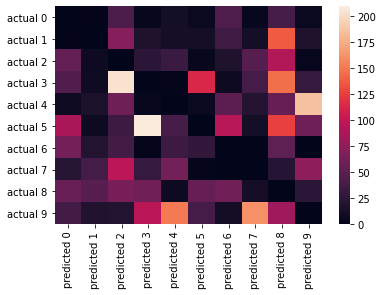

In [56]:
for i in range(10):
    readable_conf_matrix.iloc[i,i]=0
sns.heatmap(readable_conf_matrix)